In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compile all results from the polymer experiments

In [196]:
import matplotlib.pyplot as plt

plt.style.use(["science", "nature"])

import pandas as pd
from glob import glob
from pathlib import Path

from gpt3forchem.helpers import mean_confidence_interval, get_else_nan

from fastcore.utils import load_pickle

import pandas as pd


## Classification

In [197]:
all_results = glob('results/20220913_polymer_classification/*.pkl')

In [198]:
loaded_res = load_pickle(all_results[-1])

In [199]:
loaded_res

{'model_type': 'ada',
 'train_set_size': 10,
 'prefix': '',
 'train_size': 10,
 'test_size': 3115,
 'cm': pycm.ConfusionMatrix(classes: ['0', '1', '2', '3', '4']),
 'accuracy': 0.6848,
 'completions': {'choices': [<OpenAIObject at 0x2a1dd9a40> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a1dd9f90> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a1de0ea0> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a1de0040> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 4@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a1de05e0> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 3@@@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2a1de0d

In [200]:
cm = loaded_res['cm']

In [201]:
compiled_results = []
compiled_baseline_results = []

for res in all_results: 
    loaded_res = load_pickle(res)
    
    res = {
        'accuracy': get_else_nan(loaded_res['cm'], "ACC_Macro"),
        'f1_macro': get_else_nan(loaded_res['cm'], "F1_Macro"),
        'f1_micro': get_else_nan(loaded_res['cm'], "F1_Micro"),
        'mcc': get_else_nan(loaded_res['cm'], "Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    baseline_res = {
        'baseline_accuracy': get_else_nan(loaded_res['baseline_cm'],"ACC_Macro"),
        'baseline_f1_macro': get_else_nan(loaded_res['baseline_cm'], "F1_Macro"),
        'baseline_f1_micro': get_else_nan(loaded_res['baseline_cm'], "F1_Micro"),
        'baseline_mcc': get_else_nan(loaded_res['baseline_cm'],"Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    compiled_results.append(res)
    compiled_baseline_results.append(baseline_res)

In [202]:
compiled_results = pd.DataFrame(compiled_results)
compiled_baseline_results = pd.DataFrame(compiled_baseline_results)

In [177]:
compiled_results_agg = compiled_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])

In [178]:
compiled_results_agg

accuracy            \
                mean       std   
train_size                       
10          0.684686  0.006732   
50          0.729280  0.021049   
100         0.778733  0.017653   
200         0.894000  0.003960   
500         0.920000  0.001131   
1000        0.906467  0.044029   
2000        0.927911  0.002019   
3000        0.895938  0.052105   

                                                               f1_macro  \
                                     mean_confidence_interval      mean   
train_size                                                                
10          (0.6846857142857143, 0.6784597714642735, 0.690...  0.112933   
50          (0.7292799999999999, 0.7031438723960923, 0.755...  0.244508   
100         (0.7787333333333334, 0.7506435495459135, 0.806...  0.307684   
200         (0.8939999999999999, 0.858422626737989, 0.9295...  0.731222   
500         (0.9199999999999999, 0.9098350362108554, 0.930...  0.801405   
1000        (0.9064666666666668, 0.5108801592057467, 1.302...  0.712563   
2000        (0.927911111111111, 0.9228952211968329, 0.9329...  0.767989   
3000        (0.8959384615384616, 0.813027825841836, 0.9788...  0.478697   

                                                                         \
                 std                           mean_confidence_interval   
train_size                                                                
10          0.035100  (0.11293305077515074, 0.08047065150088448, 0.1...   
50          0.042908  (0.24450817508298947, 0.1912305032418129, 0.29...   
100         0.090173  (0.30768392193575367, 0.16419831755473233, 0.4...   
200         0.012927  (0.7312220158875843, 0.6150816187065343, 0.847...   
500         0.000480  (0.8014052280635731, 0.7970882595903269, 0.805...   
1000        0.189718  (0.7125631514469083, -0.9919881109405096, 2.41...   
2000        0.083297  (0.7679890610964156, 0.5610674239137416, 0.974...   
3000        0.440184  (0.47869676563082697, -0.22173437121846495, 1....   

            f1_micro            \
                mean       std   
train_size                       
10          0.211714  0.016830   
50          0.323200  0.052623   
100         0.421000  0.045855   
200         0.735000  0.009899   
500         0.800000  0.002828   
1000        0.735000  0.154149   
2000        0.808000  0.017776   
3000        0.496000  0.426783   

                                                                    mcc  \
                                     mean_confidence_interval      mean   
train_size                                                                
10          (0.2117142857142857, 0.1961494286606835, 0.227...  0.025603   
50          (0.3232, 0.25785968099023077, 0.3885403190097692)  0.173869   
100         (0.42100000000000004, 0.3480347114616603, 0.49...  0.309287   
200           (0.735, 0.6460565668449753, 0.8239434331550247)  0.671387   
500             (0.8, 0.7745875905271359, 0.8254124094728642)  0.750022   
1000          (0.735, -0.6499763162710982, 2.119976316271098)  0.688729   
2000        (0.8079999999999999, 0.7638410021154945, 0.852...  0.761469   
3000           (0.496, -0.183107495787884, 1.175107495787884)  0.478148   

                                                                         
                 std                           mean_confidence_interval  
train_size                                                               
10          0.058745  (0.025602766274933148, -0.028727586645076377, ...  
50          0.069723  (0.17386937394133012, 0.08729733792143544, 0.2...  
100         0.041058  (0.30928748379441595, 0.24395461850393013, 0.3...  
200         0.013146  (0.6713866412576392, 0.553270536852571, 0.7895...  
500         0.004010  (0.7500222816900032, 0.7139901644862173, 0.786...  
1000        0.164362  (0.6887290233112722, -0.788007006183927, 2.165...  
2000        0.020452  (0.7614686360327824, 0.7106642616095347, 0.812...  
3000        0.406149  (0.47814836327059484, 

In [179]:
compiled_baseline_results

,baseline_accuracy,baseline_f1_macro,baseline_f1_micro,baseline_mcc,train_size
0,NaN,NaN,NaN,NaN,50
1,NaN,NaN,NaN,NaN,2000
2,NaN,NaN,NaN,NaN,3000
3,NaN,NaN,NaN,NaN,500
4,NaN,NaN,NaN,NaN,3000
5,NaN,NaN,NaN,NaN,100
6,NaN,NaN,NaN,NaN,1000
7,NaN,NaN,NaN,NaN,100
8,NaN,NaN,NaN,NaN,100
9,NaN,NaN,NaN,NaN,50


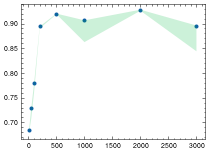

In [180]:
plt.scatter(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'],  label='GPT-3')

plt.fill_between(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'], compiled_results_agg['accuracy']['mean']- compiled_results_agg['accuracy']['std'],
compiled_results_agg['accuracy']['mean']+ compiled_results_agg['accuracy']['std'],
 alpha=0.2)

## Polymer regression

In [181]:
all_regression_results = glob('results/20220913_polymer_regression/*.pkl')

In [182]:
load_pickle(all_regression_results[0])

{'model_type': 'ada',
 'train_set_size': 50,
 'prefix': '',
 'train_size': 50,
 'test_size': 3075,
 'completions': {'choices': [<OpenAIObject at 0x2a1831770> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " -10.2@@@ -10.6"
   },
   <OpenAIObject at 0x2a1a3ff40> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " -10.2@@@ -11.6"
   },
   <OpenAIObject at 0x2a1a3f590> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " -10.2@@@ -6.2"
   },
   <OpenAIObject at 0x2a1a3fc20> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " -10.2@@@ -6.2"
   },
   <OpenAIObject at 0x2a1a3fb30> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " -6.2@@@ -6.6"
   },
   <OpenAIObject at 0x2a1a3f5e0> JSON: {
     "finish_reason": "length",
     "index": 5,
     "logprobs": null,
     "text": " -

In [183]:
compiled_regression_results = []
compiled_regression_baseline_results = []

for res_file in all_regression_results:
    res = load_pickle(res_file)
    res_dict = {
        'r2': res['r2'],
        'max_error': res['max_error'],
        'mean_absolute_error': res['mean_absolute_error'],
        'mean_squared_error': res['mean_squared_error'],
    }
    res_dict['train_size'] = res['train_size']

    baseline_res_dict = res['baseline']
    baseline_res_dict['train_size'] = res['train_size']

    compiled_regression_results.append(res_dict)
    compiled_regression_baseline_results.append(baseline_res_dict)
    

In [184]:
compiled_regression_results = pd.DataFrame(compiled_regression_results)
compiled_regression_baseline_results = pd.DataFrame(compiled_regression_baseline_results)

In [185]:
compiled_regression_results

,r2,max_error,mean_absolute_error,mean_squared_error,train_size
0,0.226682,8.9,2.3872,8.70068,50
1,0.960231,2.2,0.4876,0.39920,2000
2,-0.471216,9.6,3.1950,15.81442,10
3,-0.813002,10.8,3.7378,20.07566,50
4,-0.086554,9.6,2.7936,11.96268,100
5,0.918636,3.7,0.7476,0.88252,200
6,0.951639,2.3,0.5610,0.51410,2000
7,-0.531096,9.9,3.3098,16.08110,50
8,NaN,NaN,NaN,NaN,200
9,NaN,NaN,NaN,NaN,2000


In [186]:
compiled_regression_baseline_results

,r2,max_error,mean_absolute_error,mean_squared_error,train_size
0,0.635824,6.489332,1.629673,3.967593,50
1,0.944801,2.728487,0.612519,0.593956,2000
2,-13.970356,21.173496,12.322070,162.701655,10
3,0.735930,5.862946,1.372755,2.876094,50
4,0.907017,3.676136,0.800270,1.005736,100
5,0.920414,3.754526,0.741565,0.866107,200
6,0.940072,2.534259,0.639284,0.653068,2000
7,0.755778,5.232044,1.312021,2.659316,50
8,0.922029,3.250593,0.734493,0.849026,200
9,-0.604548,9.072791,3.808230,17.396450,2000


In [191]:
compiled_regression_results_agg = compiled_regression_results.groupby('train_size').agg(['median', 'mean', 'std', mean_confidence_interval])

compiled_regression_baseline_results = compiled_regression_baseline_results.groupby('train_size').agg(['median','mean', 'std', mean_confidence_interval])



/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis,

In [192]:
compiled_regression_results_agg

r2                      \
              median      mean       std   
train_size                                 
10         -0.471216 -0.446730  0.274130   
50         -0.139819 -0.208031  0.459539   
100         0.339904  0.295944  0.329221   
200         0.918636  0.906951  0.032941   
500         0.941871  0.943389  0.004549   
1000        0.950844  0.948633  0.006739   
2000        0.956460  0.956359  0.003860   
3000        0.966634  0.966315  0.006547   

                                                              max_error  \
                                     mean_confidence_interval    median   
train_size                                                                
10                                            (nan, nan, nan)      9.60   
50          (-0.2080313502108188, -0.7786249390056892, 0.3...      9.40   
100         (0.29594357216324657, -0.04955262842118263, 0....      8.35   
200                                           (nan, nan, nan)      3.60   
500                                           (nan, nan, nan)      2.90   
1000        (0.9486330539208673, 0.9402648808928059, 0.957...      2.50   
2000                                          (nan, nan, nan)      2.30   
3000                                          (nan, nan, nan)      1.95   

                                 \
                 mean       std   
train_size                        
10          10.000000  0.800000   
50           9.380000  1.084896   
100          8.066667  1.366260   
200          3.540000  0.512835   
500          2.850000  0.331662   
1000         2.640000  0.512835   
2000         2.280000  0.130384   
3000         1.975000  0.330404   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10                                            (nan, nan, nan)   
50          (9.379999999999999, 8.032923312064073, 10.7270...   
100         (8.066666666666668, 6.632864621579934, 9.50046...   
200                                           (nan, nan, nan)   
500                                           (nan, nan, nan)   
1000        (2.6400000000000006, 2.0032309253689378, 3.276...   
2000                                          (nan, nan, nan)   
3000                                          (nan, nan, nan)   

           mean_absolute_error                     \
                        median     mean       std   
train_size                                          
10                      3.1950  3.18008  0.282924   
50                      2.9352  2.96100  0.576990   
100                     2.1534  2.19350  0.563967   
200                     0.7476  0.78668  0.144540   
500                     0.6347  0.61930  0.035493   
1000                    0.5734  0.57916  0.026197   
2000                    0.5070  0.52040  0.030896   
3000                    0.4632  0.47740  0.043305   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10                                            (nan, nan, nan)   
50            (2.961, 2.2445728492958974, 3.6774271507041023)   
100           (2.1935, 1.601652480946783, 2.7853475190532166)   
200                                           (nan, nan, nan)   
500                                           (nan, nan, nan)   
1000        (0.5791600000000001, 0.5466324791933894, 0.611...   
2000                                          (nan, nan, nan)   
3000                                          (nan, nan, nan)   

           mean_squared_error                       \
                       median       mean       std   
train_size                                           
10                   15.81442  15.393544  2.490684   
50                   13.05760  13.346876  4.871394   
100                   7.14926   7.7

In [193]:
compiled_regression_baseline_results

r2                                                  \
               median                                                   
               median       mean std         mean_confidence_interval   
train_size                                                              
10         -13.955371 -13.955371 NaN  (-13.955370515795867, nan, nan)   
50           0.635824   0.635824 NaN   (0.6358241119233534, nan, nan)   
100          0.823838   0.823838 NaN   (0.8238384597121847, nan, nan)   
200          0.918391   0.918391 NaN   (0.9183906090663304, nan, nan)   
500          0.923930   0.923930 NaN   (0.9239303502608075, nan, nan)   
1000         0.892754   0.892754 NaN   (0.8927538871206571, nan, nan)   
2000         0.942436   0.942436 NaN   (0.9424364095773274, nan, nan)   
3000         0.942265   0.942265 NaN   (0.9422650185500208, nan, nan)   

                                                                       \
                 mean                                                   
               median       mean std         mean_confidence_interval   
train_size                                                              
10         -13.955701 -13.955701 NaN  (-13.955700755410527, nan, nan)   
50           0.659482   0.659482 NaN   (0.6594823349741767, nan, nan)   
100          0.659615   0.659615 NaN    (0.659614547208269, nan, nan)   
200          0.910051   0.910051 NaN   (0.9100510294773766, nan, nan)   
500          0.919578   0.919578 NaN   (0.9195784579102833, nan, nan)   
1000         0.897731   0.897731 NaN   (0.8977308321405115, nan, nan)   
2000         0.683634   0.683634 NaN   (0.6836339067629481, nan, nan)   
3000         0.926519   0.926519 NaN   (0.9265190855948987, nan, nan)   

                                ... mean_squared_error  \
                 std            ...             median   
              median      mean  ...                std   
train_size                      ...                      
10          0.009562  0.009562  ...                NaN   
50          0.086036  0.086036  ...                NaN   
100         0.343238  0.343238  ...                NaN   
200         0.020249  0.020249  ...                NaN   
500         0.011096  0.011096  ...                NaN   
1000        0.028762  0.028762  ...                NaN   
2000        0.631137  0.631137  ...                NaN   
3000        0.035357  0.035357  ...                NaN   

                                                                        \
                                                  mean                   
                  mean_confidence_interval      median        mean std   
train_size                                                               
10           (162.7498600016084, nan, nan)  162.753615  162.753615 NaN   
50           (3.967592723868302, nan, nan)    3.712726    3.712726 NaN   
100         (1.9110510123101587, nan, nan)    3.705904    3.705904 NaN   
200         (0.8882208899549906, nan, nan)    0.980235    0.980235 NaN   
500         (0.8290937741451392, nan, nan)    0.876092    0.876092 NaN   
1000        (1.1612489050302113, nan, nan)    1.107707    1.107707 NaN   
2000        (0.6235120875473702, nan, nan)    3.430739    3.430739 NaN   
3000        (0.6410465643158927, nan, nan)    0.800589    0.800589 NaN   

                                                                    \
                                                 std                 
                  mean_confidence_interval    median      mean std   
train_size                                                           
10           (162.7536147432016, nan, nan)  0.033085  0.033085 NaN   
50          (3.7127255491362754, nan, nan)  0.942437  0.942437 NaN   
100         (3.7059039739362554, nan, nan)  3.751347  3.751347 NaN   
200         (0.9802347968627513, nan, nan)  0.221092  0.221092 NaN   
500         (0.8760924050619294, nan, nan)  0.120526  0.120526 NaN   
1000        (1.1077070203055535, nan, nan)  0.308

ValueError: too many values to unpack (expected 1)

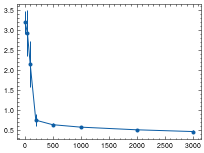

In [194]:
plt.errorbar(compiled_regression_results_agg.index, compiled_regression_results_agg['mean_absolute_error']['median'],  compiled_regression_results_agg['mean_absolute_error']['std'], label='GPT-3', marker='o')
plt.errorbar(compiled_regression_baseline_results.index, compiled_regression_baseline_results['mean_absolute_error']['median'], compiled_regression_baseline_results['mean_absolute_error']['std'], label='Baseline')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of training samples')
plt.ylabel('mean absolute error')
plt.savefig('polymer_regression.pdf', bbox_inches='tight')